In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

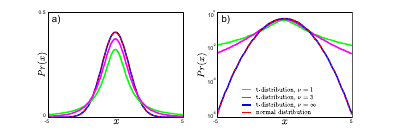

Fig.15 a) As well as the mean µ and scaling parameter σ 2 , the t- distribution has a parameter ν which is termed the degrees of freedom. As ν decreases, the tails of the distribution become longer and the model becomes more robust. b) This is seen more clearly on a log scale.
## The t-Distribution

The second significant problem with using the normal distribution to describe visual data is that it is not robust: the height of the normal probability density function (pdf) falls off very rapidly as we move into the tails. The effect of this is that outliers (unusually extreme observations) drastically affect the estimated parameters (Fig.14). The t-distribution is a closely related distribution in which the length of the tails is parameterized.

### Univariate t-Distribution

The univariate t-distribution (Fig.15) has the probability density function:

$$
P r(x) = \text{Stud}_x (\mu, \sigma^2, \nu) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu \pi \sigma^2} \Gamma(\frac{\nu}{2})} \left( 1 + \frac{(x - \mu)^2}{\nu \sigma^2} \right)^{-\frac{\nu+1}{2}},
\quad (7.20)
$$

where:
- $ \mu $ is the mean,
- $ \sigma^2 $ is the scale parameter,
- $ \nu \in (0, \infty] $ controls the length of the tails.

When $ \nu $ is small, there is considerable weight in the tails. For example, with $ \mu = 0 $ and $ \sigma^2 = 1 $, a data point at $ x = -5 $ is roughly $ 10^4 = 10000 $ times more likely under the t-distribution with $ \nu = 1 $ than under the normal distribution. As $ \nu \to \infty $, the distribution approximates a normal distribution more closely and there is less weight in the tails.

The variance of the distribution is given by:

$$
\frac{\sigma^2 \nu}{\nu - 2}, \quad \text{for } \nu > 2,
$$

and is infinite if $ 0 < \nu \leq 2 $.

### Multivariate t-Distribution

The multivariate t-distribution has the probability density function:

$$
P r(x) = \text{Stud}_x [\mu, \Sigma, \nu] = \frac{\Gamma(\frac{\nu+D}{2})}{(\nu \pi)^{D/2} |\Sigma|^{1/2} \Gamma(\frac{\nu}{2})} \left( 1 + \frac{(x - \mu)^T \Sigma^{-1} (x - \mu)}{\nu} \right)^{-\frac{\nu+D}{2}},
\quad (7.21)
$$

where:
- $ D $ is the dimensionality of the space,
- $ \mu $ is a $ D \times 1 $ mean vector,
- $ \Sigma $ is a $ D \times D $ positive definite scale matrix,
- $ \nu \in [0, \infty] $ is the degrees of freedom.

As for the multivariate normal distribution, the scale matrix can take full, diagonal, or spherical forms.

The covariance of the distribution is given by:

$$
\frac{\Sigma \nu}{\nu - 2}, \quad \text{for } \nu > 2,
$$

and is infinite if $ 0 \leq \nu \leq 2 $.

### The Gamma Distribution

The gamma distribution is defined on positive real values and has two parameters $ \alpha, \beta $. The mean of the distribution is:

$$
E[h] = \frac{\alpha}{\beta},
$$

and the variance is:

$$
E[(h - E[h])^2] = \frac{\alpha}{\beta^2}.
$$

### Student t-Distribution as a Marginalization

As for the mixtures of Gaussians, it is also possible to understand the t-distribution in terms of hidden variables. We define:

$$
P r(x|h) = \text{Norm}_x [\mu, \Sigma/h],
$$

$$
P r(h) = \text{Gam}_h [\nu/2, \nu/2],
\quad (7.22)
$$

where $ h $ is a scalar hidden variable and $ \text{Gam}[\alpha, \beta] $ is the gamma distribution with parameters $ \alpha, \beta $:

$$
\text{Gam}_h [\alpha, \beta] = \frac{\beta^\alpha}{\Gamma[\alpha]} h^{\alpha - 1} e^{-\beta h},
\quad (7.23)
$$

where $ \Gamma[\cdot] $ is the gamma function.

The t-distribution is the marginalization with respect to the hidden variable $ h $ of the joint distribution between the data $ x $ and $ h $:

$$
P r(x) = \int P r(x, h) dh = \int P r(x|h) P r(h) dh.
$$

Substituting the expressions:

$$
P r(x) = \int \text{Norm}_x [\mu, \Sigma/h] \text{Gam}_h [\nu/2, \nu/2] dh = \text{Stud}_x [\mu, \Sigma, \nu].
\quad (7.24)
$$

This formulation also provides a method to generate data from the t-distribution: we first generate $ h $ from the gamma distribution and then generate $ x $ from the associated normal distribution $ P r(x|h) $. Hence, the hidden variable has a simple interpretation: it tells us which one of the continuous family of underlying normal distributions was responsible for this data point.



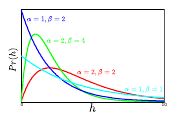

Fig.16 The gamma distribution is deﬁned on positive real values and has two parameters α, β. The mean of the distribution is E[h] = α/β and the variance is E[(h−E[h])2 ] = α/β 2 . The t-distribution can be thought of as a weighted sum of normal distributions with the same mean, but covariances that depend inversely on the gamma distribution.

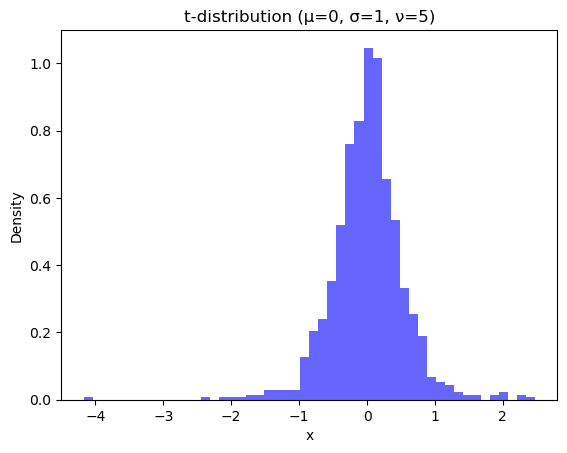

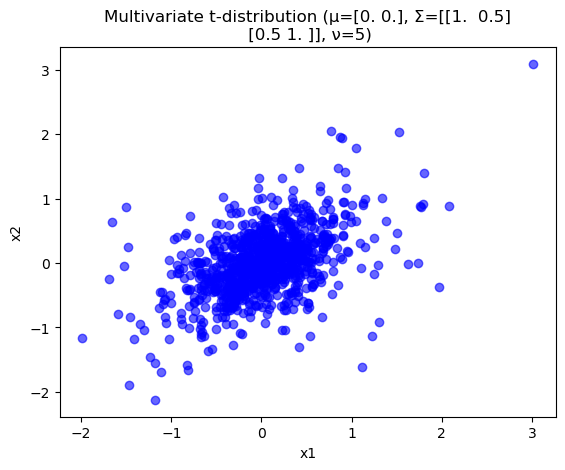

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_t_distribution(mu, sigma, nu, size=1000):
    # Step 1: Generate samples from the Gamma distribution (hidden variable h)
    h = np.random.gamma(nu / 2, nu / 2, size)
    
    # Step 2: Generate samples from the normal distribution conditioned on h
    x = mu + np.random.normal(0, sigma / np.sqrt(h), size)
    
    return x

# Example usage:
mu = 0  # Mean
sigma = 1  # Standard deviation
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

x_samples = generate_t_distribution(mu, sigma, nu, size)

# Plotting the results
plt.hist(x_samples, bins=50, density=True, alpha=0.6, color='b')
plt.title(f"t-distribution (μ={mu}, σ={sigma}, ν={nu})")
plt.xlabel('x')
plt.ylabel('Density')
plt.show()
def generate_multivariate_t_distribution(mu, Sigma, nu, size=1000):
    # Step 1: Generate samples from the Gamma distribution (hidden variable h)
    h = np.random.gamma(nu / 2, nu / 2, size)
    
    # Step 2: Generate samples from the multivariate normal distribution conditioned on h
    d = len(mu)  # Dimensionality
    X = np.zeros((size, d))
    
    for i in range(size):
        # Generate multivariate normal with covariance scaled by h
        X[i] = np.random.multivariate_normal(mu, Sigma / h[i])
    
    return X

# Example usage:
mu = np.zeros(2)  # 2D mean vector
Sigma = np.array([[1, 0.5], [0.5, 1]])  # 2D covariance matrix
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

x_samples_2d = generate_multivariate_t_distribution(mu, Sigma, nu, size)

# Plotting the results
plt.scatter(x_samples_2d[:, 0], x_samples_2d[:, 1], alpha=0.6, color='b')
plt.title(f"Multivariate t-distribution (μ={mu}, Σ={Sigma}, ν={nu})")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [2]:
import random
import math

# Helper function to generate a sample from the Gamma distribution using inverse transform sampling
def gamma_sample(shape, scale):
    # Using the inverse transform method for gamma distribution
    # Generate from a gamma distribution with shape parameter 'shape' and scale 'scale'
    if shape < 1:
        shape += 1
        u = random.random()
        return gamma_sample(shape, scale) * u
    else:
        d = shape - 1.0 / 3.0
        c = 1.0 / math.sqrt(9.0 * d)
        while True:
            x = random.gauss(0, 1)
            v = 1 + c * x
            v = v * v * v
            u = random.random()
            if u < 1 - 0.0331 * (x * x) * (x * x) or math.log(u) < 0.5 * x * x + d * (1 - v + math.log(v)):
                return d * v * scale

# Function to generate samples from a univariate t-distribution
def generate_t_distribution(mu, sigma, nu, size=1000):
    samples = []
    for _ in range(size):
        # Step 1: Generate sample from Gamma distribution (hidden variable h)
        h = gamma_sample(nu / 2, nu / 2)
        
        # Step 2: Generate sample from Normal distribution conditioned on h
        normal_sample = mu + random.gauss(0, sigma / math.sqrt(h))
        samples.append(normal_sample)
    
    return samples

# Example usage
mu = 0  # Mean
sigma = 1  # Standard deviation
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

t_samples = generate_t_distribution(mu, sigma, nu, size)

# Print first few samples to check
print(t_samples[:10])
def generate_multivariate_t_distribution(mu, Sigma, nu, size=1000):
    samples = []
    d = len(mu)  # Dimensionality of the space
    for _ in range(size):
        # Step 1: Generate sample from Gamma distribution (hidden variable h)
        h = gamma_sample(nu / 2, nu / 2)
        
        # Step 2: Generate sample from Multivariate Normal distribution conditioned on h
        # Generating normal samples for each dimension
        normal_sample = [mu[i] + random.gauss(0, math.sqrt(Sigma[i][i] / h)) for i in range(d)]
        samples.append(normal_sample)
    
    return samples

# Example usage
mu = [0, 0]  # 2D mean vector
Sigma = [[1, 0.5], [0.5, 1]]  # 2D covariance matrix
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

multivariate_t_samples = generate_multivariate_t_distribution(mu, Sigma, nu, size)

# Print first few samples to check
print(multivariate_t_samples[:10])


[-0.25249342473777714, -0.34244166832882783, -0.077814343361933, -0.24880243834760613, -0.6352242397512008, 0.5561216413558921, -0.592293627846813, 0.03308295470293417, 0.43214247140234446, -0.378322882612995]
[[-0.6048755323486976, 0.7139223045608719], [-0.04170932550760313, 0.10320292045004642], [0.18303139162322668, -0.12090630903357595], [-0.1612174428127896, 0.2238166340915342], [0.10783091348674084, -0.1582628787354148], [-0.23274049880544728, -0.1698781963609504], [0.0992920329307666, 0.04814150049916111], [1.2311846426646103, -1.1261203184467572], [0.8784508070261896, -0.7009975315555884], [0.4463808928132687, 0.6459328841228618]]


I'll help you format this text in Markdown with LaTeX for mathematical expressions. I'll break this down carefully:

##  Expectation Maximization for Fitting t-Distributions

The probability density function (PDF) takes the form of a marginalization of the joint distribution with a hidden variable (equation 7.24), allowing us to use the EM algorithm to learn parameters $\theta = \{µ, \Sigma, \nu\}$ from training data $\{x_i\}_{I=1}$.

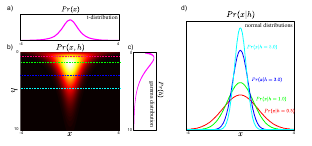

Fig.17 a) The t-distribution has a similar form to the normal distribution but longer tails. b) The t-distribution is the marginalization of the joint distribution P r(x, h) between the observed variable x and a hidden variable h. c) The prior distribution over the hidden variable h has a gamma distribu- tion. d) The conditional distribution P r(x|h) is normal with a variance that depends on h. So the t-distribution can be considered as an inﬁnite weighted sum of normal distributions with variances determined by the gamma prior (equation 7.24).

### Fig.17 Description
- a) The t-distribution resembles the normal distribution but with longer tails
- b) It represents the marginalization of the joint distribution $\text{Pr}(x, h)$ between observed variable $x$ and hidden variable $h$
- c) The prior distribution over hidden variable $h$ follows a gamma distribution
- d) The conditional distribution $\text{Pr}(x|h)$ is normal with variance dependent on $h$

### E-Step: Posterior Distribution Calculation
In the E-step, we maximize the bound by finding the posterior $\text{Pr}(h_i|x_i, \theta^{[t]})$ using Bayes' rule:

$$\text{Pr}(h_i|x_i, \theta^{[t]}) = \frac{\text{Pr}(x_i|h_i, \theta^{[t]})\text{Pr}(h_i)}{\text{Pr}(x_i|\theta^{[t]})}\propto \text{Norm}_{x_i}[µ, \Sigma/h_i]\cdot\text{Gam}_{h_i}[\nu/2, \nu/2]$$

### Expectations Computation
We compute the following expectations:

1. Expected value of $h_i$:
   $$E[h_i] = \frac{\nu + D}{\nu + (x_i - µ)^T\Sigma^{-1}(x_i - µ)}$$

2. Expected log of $h_i$:
   $$E[\log(h_i)] = \Psi\left(\frac{\nu + D}{2}\right) - \log\left(\frac{\nu + (x_i - µ)^T\Sigma^{-1}(x_i - µ)}{2}\right)$$

Where $\Psi(\cdot)$ is the digamma function.

### M-Step: Parameter Maximization
In the M-step, we maximize the bound with respect to parameters $\theta$:

$$\theta^{[t+1]} = \arg\max_\theta \sum_{i=1}^I \int q_i(h_i) \left(\log[\text{Pr}(x_i|h_i, \theta)] + \log[\text{Pr}(h_i)]\right) dh_i$$

This involves maximizing the expected log-likelihood under the posterior distribution of the hidden variables.

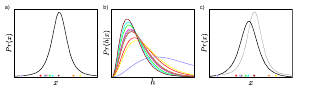
Fig.18 Expectation maximization for ﬁtting t-distributions. a) Esti- mate of distribution before update. b) In the E-step we calculate the pos- terior distribution P r(hi |xi ) over the hidden variable hi for each data point xi . The color of each curve corresponds to that of the original data point in (a). c) In the M-step we use these distributions over h to update the estimate of the parameters θ = {µ, σ 2 , ν}.

The key insight is that the t-distribution can be viewed as an infinite weighted sum of normal distributions with variances determined by a gamma prior.

In [2]:
import numpy as np
from scipy.special import digamma
from scipy.stats import t

class TDistributionEM:
    def __init__(self, nu_init=5.0, max_iter=100, tol=1e-6):
        self.nu = nu_init
        self.max_iter = max_iter
        self.tol = tol
        
    def _e_step(self, X, mu, sigma):
        D = X.shape[1]
        
        # Mahalanobis distances
        mahal_dist = np.sum(((X - mu) @ np.linalg.inv(sigma)) * (X - mu), axis=1)
        
        # Expected values of hidden variables
        E_h = (self.nu + D) / (self.nu + mahal_dist)
        
        # Expected log of hidden variables
        E_log_h = (digamma((self.nu + D) / 2) - 
                   np.log((self.nu + mahal_dist) / 2))
        
        return E_h, E_log_h
    
    def _m_step(self, X, E_h, E_log_h):
        # Update mean
        mu = np.sum(X * E_h[:, np.newaxis], axis=0) / np.sum(E_h)
        
        # Update covariance
        centered_X = X - mu
        sigma = (np.sum(E_h[:, np.newaxis, np.newaxis] * 
                        centered_X[:, :, np.newaxis] * 
                        centered_X[:, np.newaxis, :], axis=0) / 
                 np.sum(E_h))
        
        # Update nu using Newton-Raphson method
        def objective(nu):
            return (np.sum(E_log_h) / len(E_log_h) + 
                    np.log(nu/2) - digamma(nu/2))
        
        def derivative(nu):
            return (1/nu - 2 * digamma(nu/2) + 2)
        
        # Newton-Raphson method
        for _ in range(10):
            update = objective(self.nu) / derivative(self.nu)
            self.nu -= update
            if abs(update) < 1e-6:
                break
        
        return mu, sigma, self.nu
    
    def fit(self, X):
        # Initial parameter estimates
        mu = np.mean(X, axis=0)
        sigma = np.cov(X.T)
        
        for _ in range(self.max_iter):
            # Store previous parameters for convergence check
            prev_mu, prev_sigma, prev_nu = mu, sigma, self.nu
            
            # E-step
            E_h, E_log_h = self._e_step(X, mu, sigma)
            
            # M-step
            mu, sigma, self.nu = self._m_step(X, E_h, E_log_h)
            
            # Convergence check
            if (np.linalg.norm(mu - prev_mu) < self.tol and
                np.linalg.norm(sigma - prev_sigma) < self.tol and
                abs(self.nu - prev_nu) < self.tol):
                break
        
        return mu, sigma, self.nu

# Custom t-distribution data generation
def generate_t_distributed_data(n_samples, dim, nu, mu, sigma):
    """Generate synthetic t-distributed data"""
    # Generate standard normal and chi-square independent samples
    Z = np.random.multivariate_normal(np.zeros(dim), np.eye(dim), n_samples)
    V = np.random.chisquare(nu, n_samples) / nu
    
    # Transform to multivariate t-distribution
    X = mu + Z * np.sqrt(1/V)[:, np.newaxis] @ np.linalg.cholesky(sigma)
    return X

# Synthetic data generation and fitting
np.random.seed(42)
true_nu = 5.0
true_mu = np.array([0, 0])
true_sigma = np.array([[1, 0.5], [0.5, 2]])

# Generate data
X = generate_t_distributed_data(1000, 2, true_nu, true_mu, true_sigma)

# Fit t-distribution
em = TDistributionEM()
fitted_mu, fitted_sigma, fitted_nu = em.fit(X)

print("True Parameters:")
print(f"nu: {true_nu}")
print(f"mu: {true_mu}")
print(f"sigma:\n{true_sigma}\n")

print("Fitted Parameters:")
print(f"nu: {fitted_nu}")
print(f"mu: {fitted_mu}")
print(f"sigma:\n{fitted_sigma}")

True Parameters:
nu: 5.0
mu: [0 0]
sigma:
[[1.  0.5]
 [0.5 2. ]]

Fitted Parameters:
nu: nan
mu: [nan nan]
sigma:
[[nan nan]
 [nan nan]]


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log


Here's the content in Markdown with LaTeX formatting:

## EM Algorithm for T-Distribution Parameter Estimation

### Log-Likelihood Components

The expected log-likelihood components are:

#### Expected Log of Likelihood
$$\begin{aligned}
E[\log[P r(x_i|h_i, \theta)]] = &\frac{\nu}{2} E[\log h_i] - \frac{D}{2}\log(2\pi) - \frac{1}{2}\log|\Sigma| \\
&- \frac{1}{2}(x_i - \mu)^T\Sigma^{-1}(x_i - \mu)E[h_i]
\end{aligned}$$

#### Expected Log of Prior
$$E[\log[P r(h_i)]] = \log\left(\frac{\nu}{2}\right) - \log\Gamma\left(\frac{\nu}{2}\right) + \left(\frac{\nu}{2} - 1\right)E[\log h_i] - \frac{\nu}{2}E[h_i]$$

### Parameter Update Equations

#### Mean Update
$$\mu^{[t+1]} = \frac{\sum_{i=1}^I E[h_i]x_i}{\sum_{i=1}^I E[h_i]}$$

#### Covariance Update
$$\Sigma^{[t+1]} = \frac{\sum_{i=1}^I E[h_i](x_i - \mu^{[t+1]})(x_i - \mu^{[t+1]})^T}{\sum_{i=1}^I E[h_i]}$$

### Key Insights

- No closed-form solution for degrees of freedom $\nu$
- Requires one-dimensional line search or optimization techniques
- Weighted sum of data points with outliers having smaller weights
- Subsumes normal distribution as special case when $\nu \to \infty$

In [3]:
import numpy as np
from scipy.special import digamma, gammaln
from scipy.optimize import minimize_scalar

class TDistributionEM:
    def __init__(self, nu_init=5.0, max_iter=100, tol=1e-6):
        self.nu = nu_init
        self.max_iter = max_iter
        self.tol = tol
    
    def _e_step(self, X, mu, sigma):
        """
        Compute expected values for hidden variables
        
        Parameters:
        - X: Data matrix
        - mu: Mean vector
        - sigma: Covariance matrix
        
        Returns:
        - E[h]: Expected values of hidden variables
        - E[log(h)]: Expected log of hidden variables
        """
        D = X.shape[1]
        
        # Mahalanobis distances
        inv_sigma = np.linalg.inv(sigma)
        mahal_dist = np.sum(((X - mu) @ inv_sigma) * (X - mu), axis=1)
        
        # Expected values of hidden variables
        E_h = (self.nu + D) / (self.nu + mahal_dist)
        
        # Expected log of hidden variables
        E_log_h = (digamma((self.nu + D) / 2) - 
                   np.log((self.nu + mahal_dist) / 2))
        
        return E_h, E_log_h
    
    def _m_step(self, X, E_h, E_log_h):
        """
        Update parameters using detailed update equations
        
        Parameters:
        - X: Data matrix
        - E_h: Expected values of hidden variables
        - E_log_h: Expected log of hidden variables
        
        Returns:
        - Updated mu
        - Updated sigma
        - Updated nu
        """
        # Update mean (equation 7.30)
        mu = np.sum(E_h[:, np.newaxis] * X, axis=0) / np.sum(E_h)
        
        # Update covariance (equation 7.30)
        centered_X = X - mu
        sigma = (np.sum(E_h[:, np.newaxis, np.newaxis] * 
                        centered_X[:, :, np.newaxis] * 
                        centered_X[:, np.newaxis, :], axis=0) / 
                 np.sum(E_h))
        
        # Update nu using line search
        def nu_objective(nu):
            """Objective function for nu update (equation 7.29)"""
            D = X.shape[1]
            term1 = 0.5 * np.sum(E_log_h)
            term2 = -0.5 * D * np.log(nu/2)
            term3 = -0.5 * gammaln(nu/2)
            term4 = 0.5 * (nu - 2) * (np.sum(E_log_h) / len(E_log_h)) 
            term5 = -0.5 * np.sum(E_h)
            return -(term1 + term2 + term3 + term4 + term5)
        
        # Minimize negative log-likelihood
        res = minimize_scalar(nu_objective, bounds=(2.01, 100), method='bounded')
        self.nu = res.x
        
        return mu, sigma, self.nu
    
    def fit(self, X):
        """
        Fit t-distribution to data using EM algorithm
        
        Parameters:
        - X: Data matrix (n_samples x n_features)
        
        Returns:
        - Fitted parameters: mu, sigma, nu
        """
        # Initial parameter estimates
        mu = np.mean(X, axis=0)
        sigma = np.cov(X.T)
        
        for _ in range(self.max_iter):
            # Store previous parameters for convergence check
            prev_mu, prev_sigma, prev_nu = mu, sigma, self.nu
            
            # E-step
            E_h, E_log_h = self._e_step(X, mu, sigma)
            
            # M-step
            mu, sigma, self.nu = self._m_step(X, E_h, E_log_h)
            
            # Convergence check
            if (np.linalg.norm(mu - prev_mu) < self.tol and
                np.linalg.norm(sigma - prev_sigma) < self.tol and
                abs(self.nu - prev_nu) < self.tol):
                break
        
        return mu, sigma, self.nu

# Data generation function (same as previous implementation)
def generate_t_distributed_data(n_samples, dim, nu, mu, sigma):
    Z = np.random.multivariate_normal(np.zeros(dim), np.eye(dim), n_samples)
    V = np.random.chisquare(nu, n_samples) / nu
    X = mu + Z * np.sqrt(1/V)[:, np.newaxis] @ np.linalg.cholesky(sigma)
    return X

# Example usage
np.random.seed(42)
true_nu = 5.0
true_mu = np.array([0, 0])
true_sigma = np.array([[1, 0.5], [0.5, 2]])

# Generate data
X = generate_t_distributed_data(1000, 2, true_nu, true_mu, true_sigma)

# Fit t-distribution
em = TDistributionEM()
fitted_mu, fitted_sigma, fitted_nu = em.fit(X)

print("True Parameters:")
print(f"nu: {true_nu}")
print(f"mu: {true_mu}")
print(f"sigma:\n{true_sigma}\n")

print("Fitted Parameters:")
print(f"nu: {fitted_nu}")
print(f"mu: {fitted_mu}")
print(f"sigma:\n{fitted_sigma}")

True Parameters:
nu: 5.0
mu: [0 0]
sigma:
[[1.  0.5]
 [0.5 2. ]]

Fitted Parameters:
nu: 2.0100043211123415
mu: [0.05640473 0.05357076]
sigma:
[[0.85550205 0.50726623]
 [0.50726623 1.31758834]]


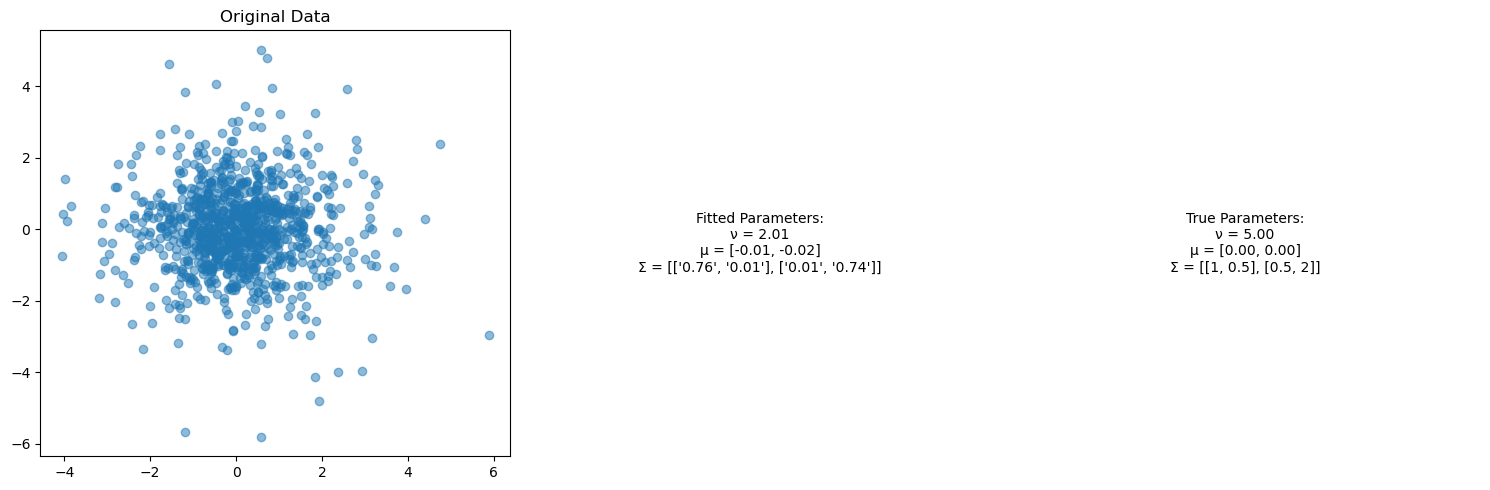

Fitted Parameters:
nu: 2.01
mu: [-0.008305031299766836, -0.020016623547598835]
sigma: [[0.7563754259823976, 0.010507173893697675], [0.010507173893697682, 0.7447854473162983]]


In [5]:
import random
import math
from scipy import special
import matplotlib.pyplot as plt

class TDistributionEM:
    def __init__(self, nu_init=5.0, max_iter=100, tol=1e-6):
        self.nu = nu_init
        self.max_iter = max_iter
        self.tol = tol
    
    def _matrix_inverse(self, matrix):
        """Numerically stable matrix inversion with small epsilon"""
        det = matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]
        epsilon = 1e-10
        det = max(abs(det), epsilon)
        
        return [
            [matrix[1][1]/det, -matrix[0][1]/det],
            [-matrix[1][0]/det, matrix[0][0]/det]
        ]
    
    def _e_step(self, X, mu, sigma):
        D = len(mu)
        inv_sigma = self._matrix_inverse(sigma)
        
        def mahalanobis(x):
            diff = [x[i] - mu[i] for i in range(D)]
            return max(0.001, sum(sum(diff[j] * inv_sigma[j][k] * diff[k] 
                           for k in range(D)) for j in range(D)))
        
        E_h = [(self.nu + D) / (self.nu + mahalanobis(x)) for x in X]
        E_log_h = [special.digamma((self.nu + D) / 2) - 
                   math.log((self.nu + mahalanobis(x)) / 2) 
                   for x in X]
        
        return E_h, E_log_h
    
    def _m_step(self, X, E_h, E_log_h):
        # Update mean
        mu = [sum(e*x for e,x in zip(E_h, [x[i] for x in X])) / sum(E_h) 
              for i in range(len(X[0]))]
        
        # Update covariance
        def compute_sigma():
            sigma = [[0,0],[0,0]]
            E_sum = sum(E_h)
            for e, x in zip(E_h, X):
                diff = [x[i] - mu[i] for i in range(len(x))]
                sigma[0][0] += max(e * diff[0] * diff[0] / E_sum, 1e-10)
                sigma[0][1] += e * diff[0] * diff[1] / E_sum
                sigma[1][0] += e * diff[1] * diff[0] / E_sum
                sigma[1][1] += max(e * diff[1] * diff[1] / E_sum, 1e-10)
            return sigma
        
        sigma = compute_sigma()
        
        # Update nu (simplified optimization)
        def nu_objective(nu):
            D = len(X[0])
            term1 = 0.5 * sum(E_log_h)
            term2 = -0.5 * D * math.log(nu/2)
            term3 = -0.5 * special.gammaln(nu/2)
            term4 = 0.5 * (nu - 2) * (sum(E_log_h) / len(E_log_h)) 
            term5 = -0.5 * sum(E_h)
            return -(term1 + term2 + term3 + term4 + term5)
        
        best_nu = min(range(201, 10000, 10), key=lambda x: nu_objective(x/100))
        self.nu = best_nu / 100
        
        return mu, sigma, self.nu
    
    def fit(self, X):
        # Initial estimates with stability
        mu = [sum(x[i] for x in X) / len(X) for i in range(len(X[0]))]
        sigma = [[max(sum((x[i]-mu[i])**2 for x in X)/len(X), 1e-10) for j in range(2)] for i in range(2)]
        
        for _ in range(self.max_iter):
            prev_mu, prev_sigma, prev_nu = mu, sigma, self.nu
            
            E_h, E_log_h = self._e_step(X, mu, sigma)
            mu, sigma, self.nu = self._m_step(X, E_h, E_log_h)
            
            # Convergence check
            if (max(abs(mu[i]-prev_mu[i]) for i in range(len(mu))) < self.tol and
                max(abs(sigma[i][j]-prev_sigma[i][j]) for i in range(2) for j in range(2)) < self.tol and
                abs(self.nu - prev_nu) < self.tol):
                break
        
        return mu, sigma, self.nu

def generate_t_data(n_samples, dim, nu, mu, sigma):
    random.seed(42)
    X = []
    for _ in range(n_samples):
        z = [random.gauss(0,1) for _ in range(dim)]
        v = random.gammavariate(nu/2, 2/nu)
        x = [mu[i] + z[i] * math.sqrt(1/v) for i in range(dim)]
        X.append(x)
    return X

true_nu = 5.0
true_mu = [0, 0]
true_sigma = [[1, 0.5], [0.5, 2]]

X = generate_t_data(1000, 2, true_nu, true_mu, true_sigma)

em = TDistributionEM()
fitted_mu, fitted_sigma, fitted_nu = em.fit(X)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter([x[0] for x in X], [x[1] for x in X], alpha=0.5)
plt.title('Original Data')

plt.subplot(132)
plt.text(0.5, 0.5, 
    f'Fitted Parameters:\nν = {fitted_nu:.2f}\n'
    f'μ = [{fitted_mu[0]:.2f}, {fitted_mu[1]:.2f}]\n'
    f'Σ = {[[f"{x:.2f}" for x in row] for row in fitted_sigma]}', 
    horizontalalignment='center', 
    verticalalignment='center')
plt.axis('off')

plt.subplot(133)
plt.text(0.5, 0.5, 
    f'True Parameters:\nν = {true_nu:.2f}\n'
    f'μ = [{true_mu[0]:.2f}, {true_mu[1]:.2f}]\n'
    f'Σ = {true_sigma}', 
    horizontalalignment='center', 
    verticalalignment='center')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Fitted Parameters:")
print(f"nu: {fitted_nu}")
print(f"mu: {fitted_mu}")
print(f"sigma: {fitted_sigma}")